# Forschungsdaten der  Berlin-Brandenburgischen Akademie der Wissenschaften

<a id="0"></a>
## Inhalt

<a id="0"></a>
## Inhalt

1. [Statistische Beschreibung des Datensatzes](#1)

2. [Univariate Plots](#2)

   [Entstehungszeit der Ressourcen](#2.4)

   [Verteilung der Publisher](#2.5)

   [Verteilung der Lizenzangaben](#2.6)

   [Verteilung des Ressourcentyps](#2.7)
   
   [Verteilung des Ressourcenformats](#2.8)

3. [Word Clouds](#3)

   [Häufige Titelbegriffe](#3.1)

   [Beschreibung der Ressource](#3.2)

   [Thema der Ressource](#3.3)

   [Urheber*innen](#3.4)

4. [Bi- und multivariate Plots](#4)

<a id="1"></a>
## 1 Statistische Beschreibung des Datensatzes

[Zurück zum Anfang](#0)

In [34]:
# Importieren der Bibliotheken
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Laden der Daten
data_bbaw = pd.read_csv(r'../../data/refined/clarin/bbaw/bbaw-records-20240620_refined.csv')
# Umwandeln der Datentypen der Zeitangaben in datetime-Objekte
data_bbaw[['date', 'datestamp']] = data_bbaw[['date', 'datestamp']].apply(pd.to_datetime, errors='coerce')

In [2]:
YlOrBr_palette = sns.color_palette('YlOrBr', 8, as_cmap=False)
YlOrBr_hex = YlOrBr_palette.as_hex()
print(YlOrBr_hex)
sns.color_palette('YlOrRd', 8)

['#fff8c1', '#fee89b', '#fece65', '#fead3a', '#f6861f', '#e1640e', '#c04602', '#933204']


[(1.0, 0.9379930795847751, 0.6484275278738947),
 (0.9970319108035371, 0.8700499807766243, 0.5027912341407151),
 (0.996078431372549, 0.7490196078431373, 0.35294117647058826),
 (0.9939407920030757, 0.6189465590157632, 0.26383698577470205),
 (0.9903729334871204, 0.4405536332179931, 0.2031833910034602),
 (0.9555555555555556, 0.23790849673202616, 0.14640522875816994),
 (0.8539638600538254, 0.07717031910803537, 0.11933871587850826),
 (0.7120953479430988, 0.0, 0.14901960784313725)]

In [32]:
data_bbaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17723 entries, 0 to 17722
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   datestamp                  5854 non-null   datetime64[ns, UTC]
 1   identifier                 17500 non-null  object             
 2   subject                    10218 non-null  object             
 3   title                      5854 non-null   object             
 4   publisher                  5854 non-null   object             
 5   date                       4650 non-null   datetime64[ns, UTC]
 6   type                       5846 non-null   object             
 7   language                   5831 non-null   object             
 8   source                     5831 non-null   object             
 9   rights                     5830 non-null   object             
 10  creator                    3622 non-null   object             
 11  fo

In [4]:
data_bbaw.head()

,datestamp,identifier,subject,title,publisher,date,type,language,source,rights,creator,format,format - mediatype,format - subtype,relation,contributor,description,coverage,record - header - setSpec
0,2022-12-12 11:38:53+00:00,https://hdl.handle.net/21.11120/0000-0008-3175-D,webservice,SynCoP - Dependency Parser,Digitales Wörterbuch der deutschen Sprache (DWDS),2016-07-29 15:34:22+00:00,text,NaN,NaN,NaN,"Didakowski, Jörg",NaN,NaN,NaN,WebLichtWebServices,WebLichtWebServices,WebLichtWebServices,NaN,WebLichtWebServices
1,2022-12-12 11:38:53+00:00,https://hdl.handle.net/21.11120/0000-0008-3188-7,NaN,WebLichtWebServices,WebLichtWebServices,2014-01-20 15:36:36+00:00,NaN,NaN,NaN,NaN,WebLichtWebServices,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WebLichtWebServices
2,2022-12-12 11:38:53+00:00,https://hdl.handle.net/21.11120/0000-0008-3189-6,NaN,WebLichtWebServices,WebLichtWebServices,2014-01-20 15:36:40+00:00,NaN,NaN,NaN,NaN,WebLichtWebServices,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WebLichtWebServices
3,2022-12-12 11:38:53+00:00,https://hdl.handle.net/21.11120/0000-0008-318C-3,webservice,dlexDB Types,Lexikalische Datenbank (dlexDB),2016-09-06 15:36:12+00:00,text,NaN,NaN,NaN,"Pohl, Edmund",NaN,NaN,NaN,WebLichtWebServices,WebLichtWebServices,WebLichtWebServices,NaN,WebLichtWebServices
4,2022-12-12 11:38:53+00:00,https://hdl.handle.net/21.11120/0000-0008-318D-2,webservice,dlexDB Types: Frequency per million,Lexikalische Datenbank (dlexDB),2016-08-16 15:36:12+00:00,text,NaN,NaN,NaN,"Pohl, Edmund",NaN,NaN,NaN,WebLichtWebServices,WebLichtWebServices,WebLichtWebServices,NaN,WebLichtWebServices


In [5]:
data_bbaw.describe()

,datestamp,identifier,subject,title,publisher,date,type,language,source,rights,creator,format,format - mediatype,format - subtype,relation,contributor,description,coverage,record - header - setSpec
count,5854,17500,10218,5854,5854,4650,5846,5831,5831,5830,3622,412,412,400,28,26,25,12,5851
unique,NaN,17461,233,4225,9,NaN,1,1,5485,13,1401,7,1,1,7,11,4,7,6
top,NaN,http://de.clarin.eu/de/kurationsprojekt-1-3-ge...,Gebrauchsliteratur,Neue Rheinische Zeitung – Organ der Demokratie...,Deutsches Textarchiv (DTA-Erweiterungen),NaN,text,deu,"Vorau, Stiftsbibl.: Cod. 276, http://www.hands...",CC NC,"Humboldt, Alexander von",text xml,text,xml,WebLichtWebServices,WebLichtWebServices,WebLichtWebServices,http://de.clarin.eu/en/curation-project-1-3-ge...,dta
freq,NaN,4,1774,530,2987,NaN,5846,5831,19,3215,185,400,412,400,14,13,14,4,4711
mean,2022-12-12 11:39:20.827468544+00:00,NaN,NaN,NaN,NaN,1834-04-30 13:13:49.562795520+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2022-12-12 11:38:53+00:00,NaN,NaN,NaN,NaN,1678-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2022-12-12 11:39:08+00:00,NaN,NaN,NaN,NaN,1796-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2022-12-12 11:39:22+00:00,NaN,NaN,NaN,NaN,1848-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2022-12-12 11:39:33+00:00,NaN,NaN,NaN,NaN,1878-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2022-12-12 11:39:47+00:00,NaN,NaN,NaN,NaN,2022-07-26 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print(list(data_bbaw.columns))

['datestamp', 'identifier', 'subject', 'title', 'publisher', 'date', 'type', 'language', 'source', 'rights', 'creator', 'format', 'format - mediatype', 'format - subtype', 'relation', 'contributor', 'description', 'coverage', 'record - header - setSpec']


<a id="2"></a>
## 2 Univariate Plots

***Untersuchte Variablen***

- date
- publisher
- rights
- type
- format


[Zurück zum Anfang](#0)


### Entstehungszeit der Ressourcen

[Zurück zum Anfang](#0)

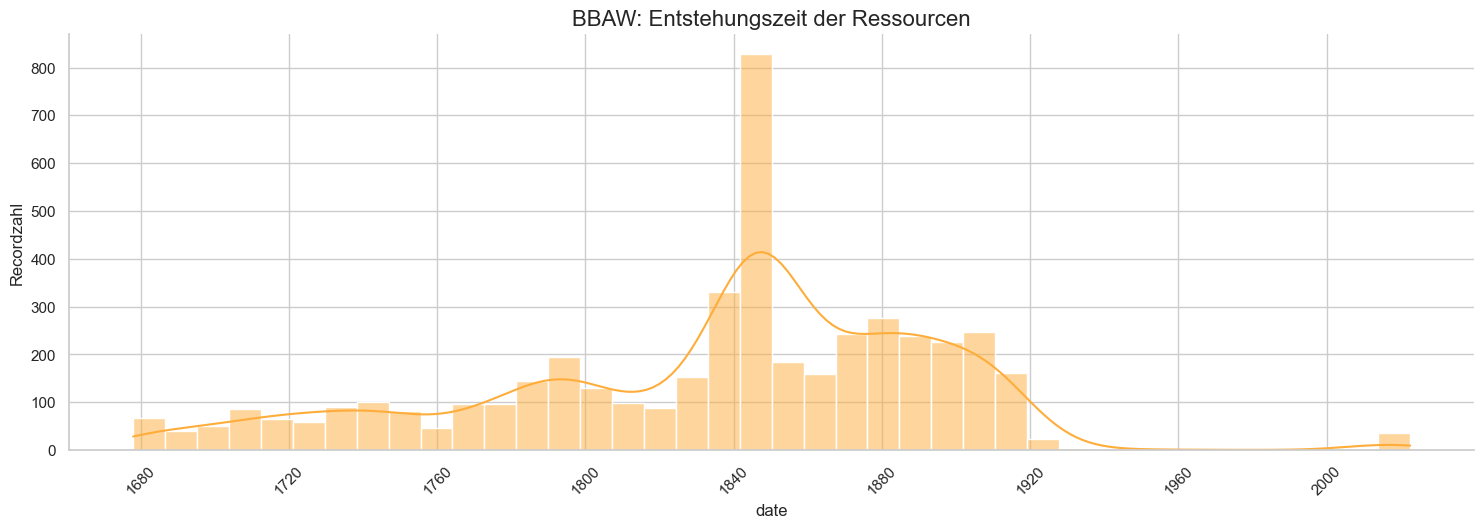

In [52]:
sns.set_style('whitegrid')  # seaborn-Design setzen

sns.displot(data_bbaw, x='date', bins=40, kde=True, color='#fead3a', aspect=3)  # Erscheinungszeitpunkt der Forschungsdaten in absoluten Zahlen

plt.xticks(rotation=45)
plt.title('BBAW: Entstehungszeit der Ressourcen', fontsize=16)
plt.xlabel('date', fontsize=12)
plt.ylabel('Recordzahl', fontsize=12)
plt.show()


In [43]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.8',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.round: 'round'>,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

<a id="2.5"></a>
### Verteilung der Publisher

[Zurück zum Anfang](#0)



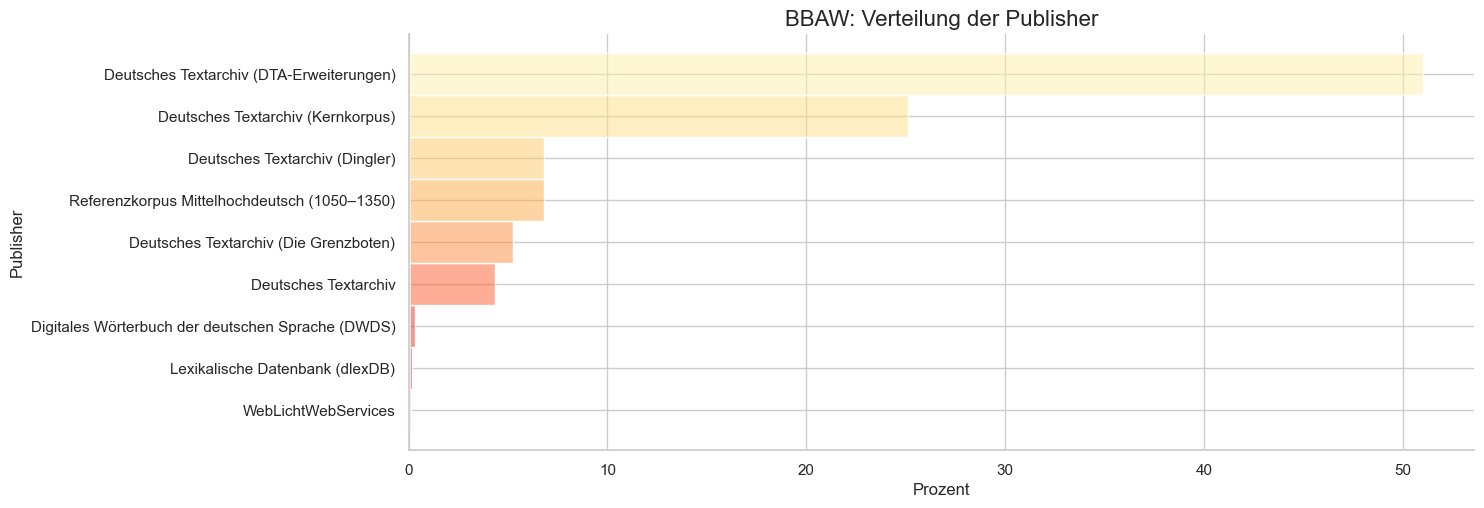

In [8]:
# Reihenfolge der Sprachen festlegen
order = data_bbaw['publisher'].value_counts().index 
# Konvertieren der Daten in kategorische Variablen
data_bbaw['publisher'] = pd.Categorical(data_bbaw['publisher'], categories=order, ordered=True)


sns.set_style('whitegrid')
sns.displot(data_bbaw, y = 'publisher', hue='publisher', palette="YlOrRd", aspect = 3, legend=False, stat = 'percent')


plt.title('BBAW: Verteilung der Publisher', fontsize=16)
plt.xlabel('Prozent', fontsize=12)
plt.ylabel('Publisher', fontsize=12)
plt.show()

<a id="2.6"></a>
### Verteilung der Lizenzangaben

[Zurück zum Anfang](#0)

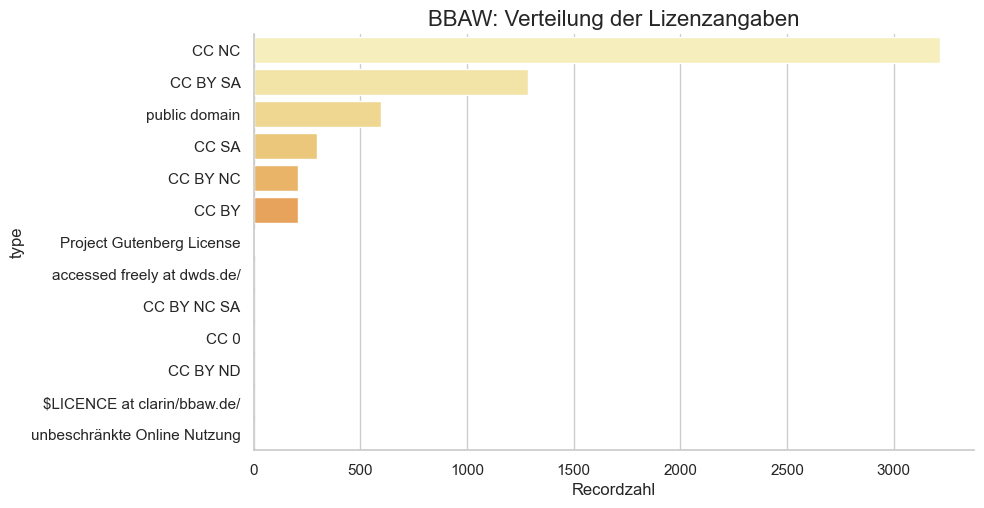

In [53]:
order = data_bbaw['rights'].value_counts().index
# Convert the column to a categorical type with the calculated order
data_bbaw['rights'] = pd.Categorical(data_bbaw['rights'], categories=order, ordered=True)


sns.catplot(data_bbaw, y = 'rights', kind='count', aspect = 2, hue = 'rights', palette="YlOrRd", legend=False)

plt.title('BBAW: Verteilung der Lizenzangaben', fontsize=16)
plt.xlabel('Recordzahl', fontsize=12)
plt.ylabel('type', fontsize=12)
plt.show()

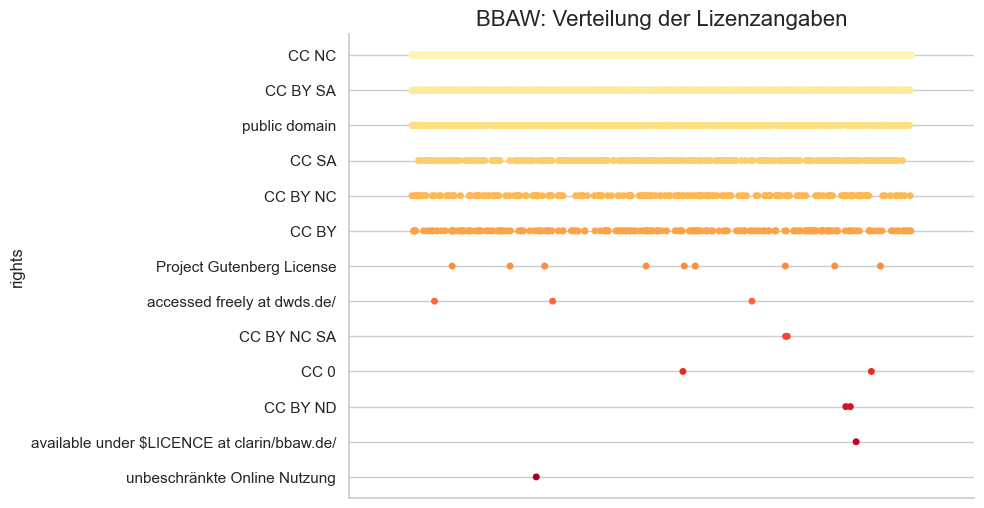

In [10]:
order = data_bbaw['rights'].value_counts().index
# Convert the column to a categorical type with the calculated order
data_bbaw['rights'] = pd.Categorical(data_bbaw['rights'], categories=order, ordered=True)


sns.catplot(data_bbaw, y = 'rights', aspect = 2, hue = 'rights', palette="YlOrRd", jitter=0.4, legend=False)

plt.title('BBAW: Verteilung der Lizenzangaben', fontsize=16)
plt.ylabel('rights', fontsize=12)
plt.show()

<a id="2.7"></a>
### Verteilung des Ressourcentyps

[Zurück zum Anfang](#0)

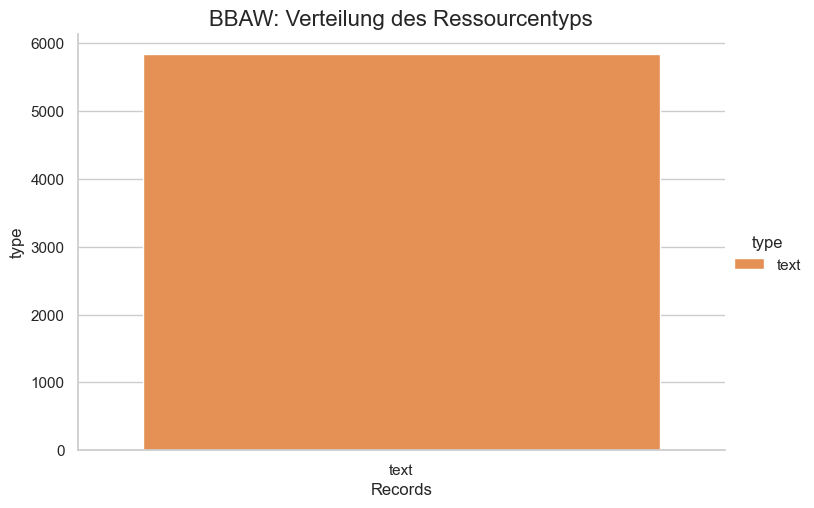

In [54]:
order = data_bbaw['type'].value_counts().index
# Convert the column to a categorical type with the calculated order
data_bbaw['type'] = pd.Categorical(data_bbaw['type'], categories=order, ordered=True)

sns.catplot(data_bbaw, x = 'type', kind = 'count', aspect = 1.5, hue = 'type', palette='YlOrRd')

plt.title('BBAW: Verteilung des Ressourcentyps', fontsize=16)
plt.xlabel('Records', fontsize=12)
plt.ylabel('type', fontsize=12)
plt.show()


<a id="2.8"></a>
### Verteilung des Ressourcenformats

[Zurück zum Anfang](#0)

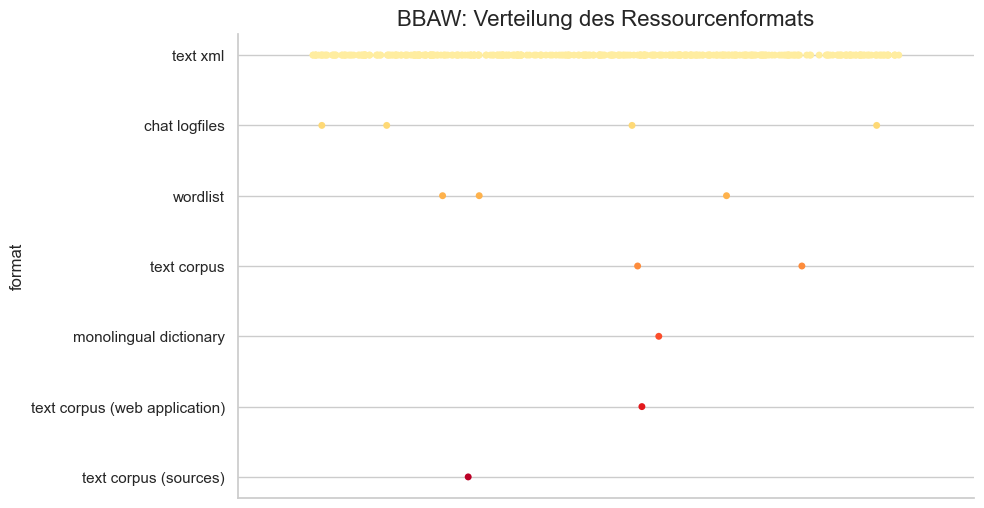

In [55]:
order = data_bbaw['format'].value_counts().index
# Convert the column to a categorical type with the calculated order
data_bbaw['format'] = pd.Categorical(data_bbaw['format'], categories=order, ordered=True)


sns.catplot(data_bbaw, y = 'format', aspect = 2, hue = 'format', palette="YlOrRd", jitter=0.4, legend=False)

plt.title('BBAW: Verteilung des Ressourcenformats', fontsize=16)
plt.ylabel('format', fontsize=12)
plt.show()


<a id="3"></a>
## Word Clouds

   - title

   - subject

   - creator



<a id="3.1"></a>
### Häufige Titelbegriffe

[Zurück zum Anfang](#0)

{'Ausgabe': 1.0, 'vollständige': 0.9994474120464174, 'digitalisierte': 0.997605452201142, 'de': 0.15969791858537483, 'Zeitung': 0.1550930189721864, 'vnd': 0.12377970160250507, 'Neue': 0.10499171118069626, 'Organ': 0.10480751519616872, 'Band': 0.09965002762939767, 'Rheinische': 0.09780806778412231, 'Demokratie': 0.09762387179959477, 'Nr': 0.07662552956345552, 'Journal': 0.07367839381101492, 'Jahrgang': 0.07367839381101492, 'Polytechnisches': 0.07275741388837724, 'Bey': 0.06907349419782649, 'für': 0.06317922269294529, 'an': 0.06281083072389022, 'Herrn': 0.05857432307975686, 'Jg': 0.05673236323448149, 'Allgemeine': 0.046601584085466934, 'mit': 0.04162829250322343, 'zur': 0.04125990053416836, 'über': 0.04107570454964082, 'Num': 0.03904954871983791, 'im': 0.038128568797200224, 'am': 0.03720758887456253, 'Brief': 0.0355498250138147, 'Christliche': 0.03186590532326395, 'II': 0.029471357524405967, 'Dingler': 0.028181985632713208, 'al': 0.028181985632713208, 'Geschichte': 0.026708417756492908, 

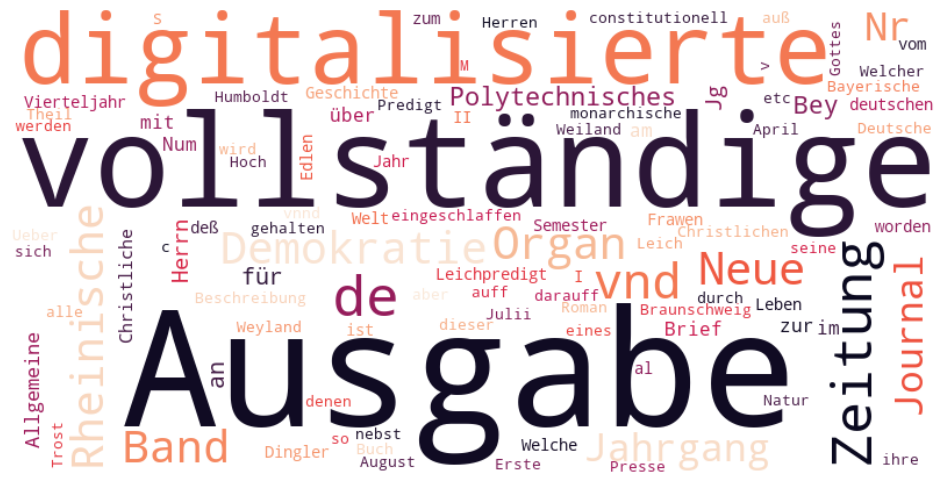

In [13]:

text_data = data_bbaw["title"].str.cat(sep=' ') # Werte werden als string zusammengefügt
stopwords = set(['der', 'die', 'das', 'wer', 'wie', 'was', 'wieso', 'weshalb', 'warum', 'den', 'dem', 'ein', 'eine', 'einer', 'einen', 'einem', 'oder', 'und', 'auch', 'auf', 'von', 'zu', 'in', 'aus', 'vor', 'nach']) # Stopwortliste
 
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='rocket', max_words=100, stopwords = stopwords, collocations=False).generate(text_data) # Erstellung der Wordcloud ohne collocations
print(wordcloud.words_) # Ausgabe der Wörter und ihrer Häufigkeit

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show() # Anzeige der Wordcloud


<a id="3.3"></a>
### Thema der Ressource

[Zurück zum Anfang](#0)

{'Gebrauchsliteratur': 1.0, 'Zeitung': 0.826944757609921, 'Wissenschaft': 0.822435174746336, 'Belletristik': 0.45659526493799324, 'Leichenpredigt': 0.18883878241262683, 'Zeitschrift': 0.1741826381059752, 'Religion': 0.161217587373168, 'Roman': 0.12232243517474634, 'Theologie': 0.12119503945885006, 'Brief': 0.11443066516347238, 'Lyrik': 0.09188275084554678, 'Gesellschaft': 0.08680947012401354, 'Poesie': 0.0834272829763247, 'Novelle': 0.07102593010146561, 'Gelegenheitsschrift': 0.06820744081172492, 'Tod': 0.0665163472378805, 'Drama': 0.05918827508455468, 'Prosa': 0.05636978579481398, 'Philosophie': 0.052423900789177004, 'Recht': 0.04114994363021421, 'Geographie': 0.03889515219842165, 'Biologie': 0.036076662908680945, 'Sonstiges': 0.03156708004509583, 'Historiographie': 0.02987598647125141, 'Medizin': 0.02874859075535513, 'Jura': 0.02818489289740699, 'Reiseliteratur': 0.02705749718151071, 'Naturwissenschaft': 0.02593010146561443, 'Physik': 0.02536640360766629, 'Kunstgeschichte': 0.0236753

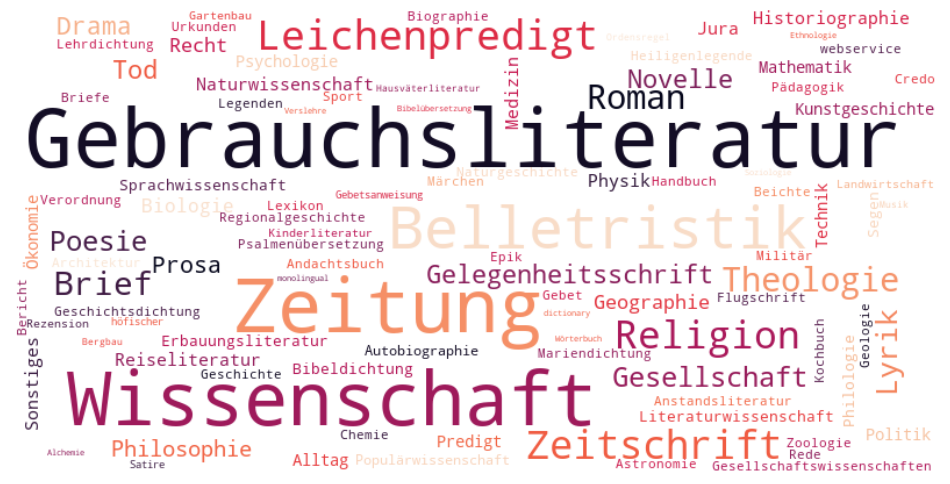

In [14]:

text_data = data_bbaw["subject"].str.cat(sep=' ') # Werte werden als string zusammengefügt
stopwords = set(['der', 'die', 'das', 'wer', 'wie', 'was', 'wieso', 'weshalb', 'warum', 'den', 'dem', 'ein', 'eine', 'einer', 'einen', 'einem', 'oder', 'und', 'auch', 'auf', 'von', 'zu', 'in', 'aus', 'vor', 'nach']) # Stopwortliste
 
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='rocket', max_words=100, stopwords = stopwords, collocations=False).generate(text_data) # Erstellung der Wordcloud ohne collocations
print(wordcloud.words_) # Ausgabe der Wörter und ihrer Häufigkeit

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show() # Anzeige der Wordcloud

<a id="3.4"></a>
### Urheber*innen

[Zurück zum Anfang](#0)

{'Johann Gottfried': 1.0, 'Humboldt Alexander': 0.925, 'Sanders Daniel': 0.86, 'Gottfried Dingler': 0.815, 'Dingler Johann': 0.805, 'Daniel Sanders': 0.765, 'Dingler Emil': 0.665, 'Emil Maximilian': 0.665, 'Maximilian Dingler': 0.665, 'Dach Simon': 0.56, 'Simon Dach': 0.495, 'Heinrich': 0.435, 'Georg': 0.43, 'Zemann Johann': 0.39, 'N N': 0.39, 'Johann Ferdinand': 0.38, 'Ferdinand Fischer': 0.38, 'Fischer Zemann': 0.38, 'Wilhelm': 0.285, 'Johann Friedrich': 0.25, 'Friedrich': 0.24, 'Christoph': 0.24, 'Carl': 0.235, 'A Hollenberg': 0.23, 'H Kast': 0.22, 'Ludwig': 0.215, 'Kast A': 0.215, 'Hollenberg H': 0.21, 'August': 0.2, 'Blumenbach Johann': 0.175, 'Johannes': 0.155, 'Christian': 0.15, 'Friedrich Blumenbach': 0.14, 'Johann Jacob': 0.13, 'Sattler Basilius': 0.13, 'Hermann': 0.12, 'Goethe Johann': 0.12, 'Johann Wolfgang': 0.12, 'Herder Johann': 0.12, 'Jean Paul': 0.12, 'Otto': 0.115, 'Friedrich Wilhelm': 0.11, 'Basilius Sattler': 0.11, 'Martin': 0.1, 'Ernst': 0.095, 'Gottlieb': 0.095, 'P

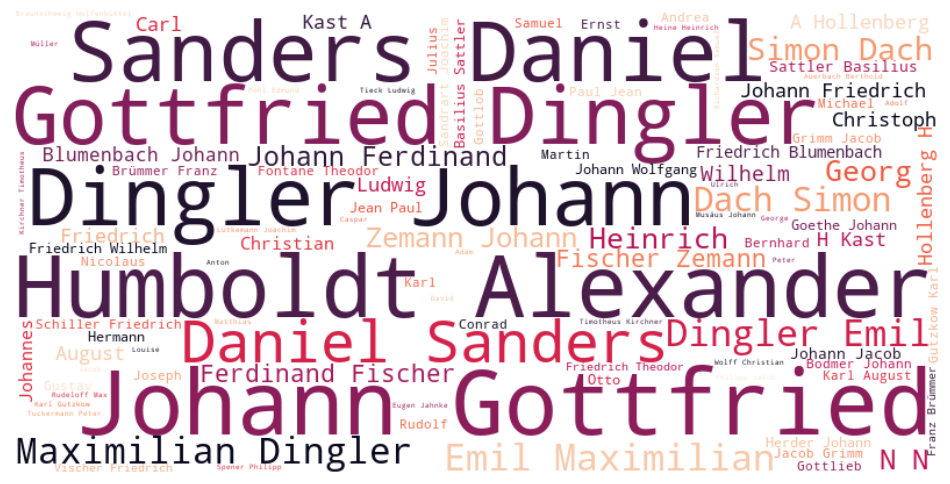

In [15]:

text_data = data_bbaw["creator"].str.cat(sep=' ') # Werte werden als string zusammengefügt
stopwords = set(['der', 'die', 'das', 'wer', 'wie', 'was', 'wieso', 'weshalb', 'warum', 'den', 'dem', 'ein', 'eine', 'einer', 'einen', 'einem', 'oder', 'und', 'auch', 'auf', 'von', 'zu', 'in', 'aus', 'vor', 'nach']) # Stopwortliste
 
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='rocket', max_words=100, stopwords = stopwords).generate(text_data) # Erstellung der Wordcloud mit collocations
print(wordcloud.words_) # Ausgabe der Wörter und ihrer Häufigkeit

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show() # Anzeige der Wordcloud

## Bi- und multivariate Plots

<a id="3.4"></a>
### Zusammenhang von Merkmalen: Publisher und Lizenz

[Zurück zum Anfang](#0)

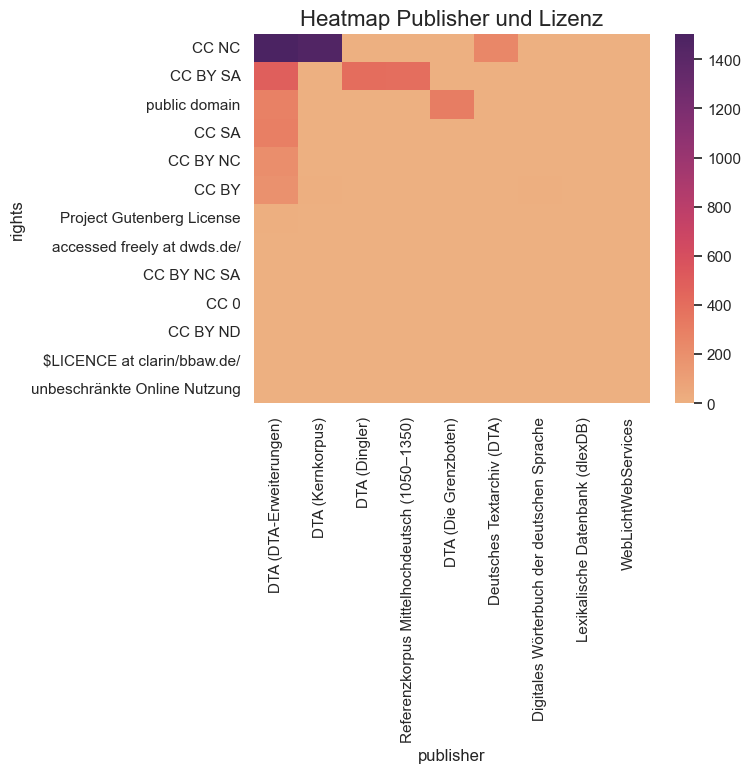

In [40]:
order_rights = data_bbaw['rights'].value_counts().index
# Convert the column to a categorical type with the calculated order
data_bbaw['rights'] = pd.Categorical(data_bbaw['rights'], categories=order_rights, ordered=True)



# Create a pivot table
pivot_table = data_bbaw.pivot_table(index='rights', columns='publisher', aggfunc='size', observed=False, fill_value=0)
sns.heatmap(pivot_table, cmap='flare')

# Plot the heatmap
# plt.figure(figsize=(12, 8))

plt.title('Heatmap Publisher und Lizenz', fontsize=16)
plt.xlabel('publisher', fontsize=12)
plt.ylabel('rights', fontsize=12)
# plt.xticks(rotation=45)
plt.show()
